<a href="https://colab.research.google.com/github/xh313/TidyTuesdayWithPython/blob/main/TidyTuesday01032022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install extra packages
!pip install geopandas
!pip install geoplot

In [1]:
#Run from here after first time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import matplotlib.pylab as pl
import math
from collections import Counter
import csv
import matplotlib as mpl

In [2]:
import geopandas as gpd
import geoplot as gplt

In [ ]:
# Read data
all = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-03-01/stations.csv')
df = all

gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.LONGITUDE, df.LATITUDE))

#gdf.head()  # For Inspection Only

In [4]:
mpl.font_manager.fontManager.addfont('/content/drive/MyDrive/Avenir.ttc')
mpl.rc('font', family='Avenir')  # Changing all runtime fonts into Avenir

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


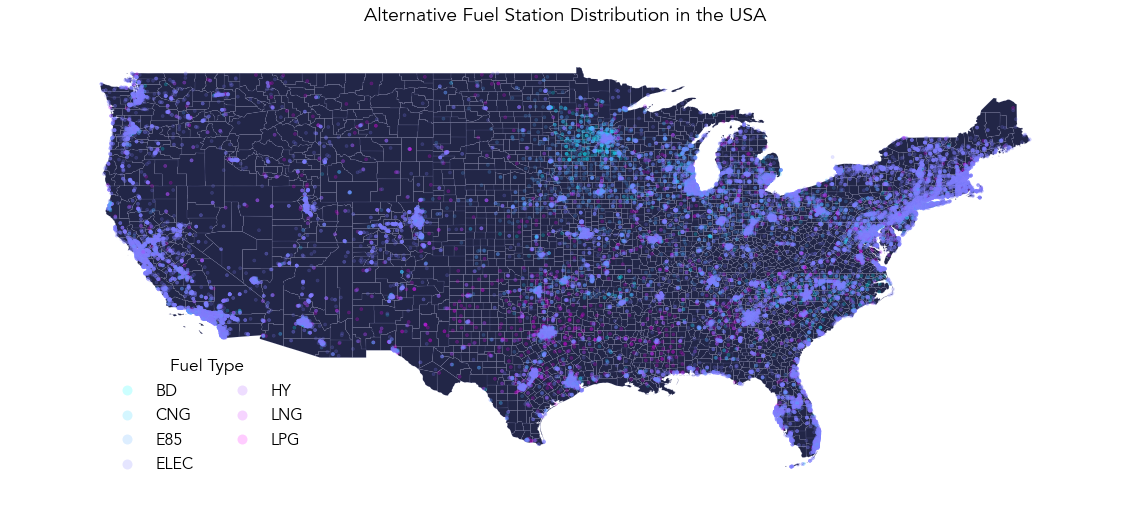

In [26]:
geoData = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')
geoData.id = geoData.id.astype(str).astype(int)
stateToRemove = ['02', '15', '72']  # Remove Alaska and minor outlying islands
usa = geoData[~geoData.STATE.isin(stateToRemove)]
#usa = geoData  # Uncomment to keep Alaska and outlying islands


# Just the map
ax = gplt.polyplot(usa,
                   #projection=gcrs.AlbersEqualArea(),  # Somehow this crashes
                   zorder=-1,
                   linewidth=0.5,
                   edgecolor=(0.7,0.7,1,0.15),
                   facecolor='#222647',
                    figsize=(20, 13),
                   )

# The data points
gdf.plot(column='FUEL_TYPE_CODE', ax=ax, markersize=10, cmap="cool", 
         alpha=0.2, legend=True, 
         legend_kwds={'frameon': False, 'title':'Fuel Type',
                      'ncol':2, 'loc':3,
                      'bbox_to_anchor':(0.08, 0.04),
                      'title_fontsize':'xx-large'
                      })  # Just to make sure the legend looks nice

plt.title('Alternative Fuel Station Distribution in the USA')

#plt.savefig('AltFuelUSA.jpeg', dpi=300)    
#plt.savefig('AltFuelUSA.svg')            
plt.show()